#  Permutation Importances of sklearn(Foodtruck dataset)

In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [2]:
# Read the CSV file
dataset = pd.read_csv('foodtruck.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :-12]
y = dataset.iloc[:, -12:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (407, 33)
X.shape: (407, 21)


,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,...,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
0,2,1,30,1,5,4,4,3,4,4,...,3,3,2,2,1,2,1.5,4,0,1
1,0,1,20,2,5,2,4,4,4,4,...,2,3,1,4,0,3,2.0,5,1,0
2,1,2,15,2,5,2,2,5,3,5,...,2,2,2,1,1,2,1.5,4,1,1
3,0,3,40,1,5,5,4,3,4,4,...,4,5,1,1,1,3,2.0,6,1,1
4,0,1,15,4,5,4,2,3,4,4,...,3,4,1,1,1,2,1.5,4,1,1


y.shape: (407, 12)


,street_food,gourmet,italian_food,brazilian_food,mexican_food,chinese_food,japanese_food,arabic_food,snacks,healthy_food,fitness_food,sweets_desserts
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


Descriptive stats:


,frequency,time,expenses,motivation,taste,hygiene,menu,presentation,attendance,ingredients,...,takeaway,variation,stop.strucks,schedule,gender,age.group,scholarity,average.income,has.work,marital.status
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.761671,1.918919,21.486486,2.469287,4.771499,4.651106,3.773956,4.272727,4.535627,4.481572,...,2.732187,3.420147,2.690418,2.663391,0.481572,2.358722,1.640049,2.958231,0.511057,0.867322
std,0.987461,1.423176,7.247503,1.314345,0.595032,0.699150,1.097696,0.877647,0.724711,0.799649,...,0.982367,1.070374,1.283653,1.356325,0.500275,1.412145,0.907029,1.569640,0.500493,0.367509
min,0.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,15.000000,1.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,...,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000
50%,0.000000,1.000000,20.000000,2.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,0.000000,2.000000,1.500000,3.000000,1.000000,1.000000
75%,1.000000,2.000000,20.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,2.000000,4.000000,1.000000,1.000000
max,4.000000,5.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1.000000,8.000000,5.000000,6.000000,1.000000,2.000000


In [3]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (284, 21)
X_test.shape: (123, 21)
y_train.shape: (284, 12)
y_test.shape: (123, 12)


## ClassifierChain

In [4]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(RandomForestClassifier(criterion='entropy'), order='random', random_state=0)
chain_clf.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(criterion='entropy'),
                order='random', random_state=0)

## MultiOutputClassifier

In [5]:
from sklearn.multioutput import MultiOutputClassifier
MO_clf = MultiOutputClassifier(RandomForestClassifier(criterion='entropy'), n_jobs=-1)
MO_clf.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(criterion='entropy'),
                      n_jobs=-1)

## transform the shape of data from dataframe to array

In [6]:
X_train_array=X_train.values
y_train_array=y_train.values
X_test_array=X_test.values
y_test_array=y_test.values

## MLkNN

In [7]:
from skmultilearn.adapt import MLkNN

MLkNN_clf = MLkNN(k=3)

# train
MLkNN_clf.fit(X_train_array, y_train_array)


MLkNN(k=3)

## Binary Relevance Classifier

In [8]:
from skmultilearn.problem_transform import BinaryRelevance

# initialize Binary Relevance multi-label classifier
# with randomforest classifier


br_clf = BinaryRelevance(
    classifier = RandomForestClassifier(criterion='entropy'),
    require_dense = [False, True]
)

# train
br_clf.fit(X_train_array, y_train_array)

BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy'),
                require_dense=[False, True])

## Classifier Chains(scikit multi-learn)

In [9]:
from skmultilearn.problem_transform import ClassifierChain

# initialize Classifier Chain multi-label classifier
# with randomforest classifier

cc_clf2 = ClassifierChain(
    classifier = RandomForestClassifier(criterion='entropy'),
    require_dense = [False, True]
)

# train
cc_clf2.fit(X_train_array, y_train_array)


ClassifierChain(classifier=RandomForestClassifier(criterion='entropy'),
                require_dense=[False, True])

## Label Powerset

In [10]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

# initialize LabelPowerset multi-label classifier with a RandomForest
lp_clf = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
lp_clf.fit(X_train_array, y_train_array)


ClassifierChain(classifier=RandomForestClassifier(),
                require_dense=[False, True])

## sklearn permutation_importance

In [5]:
from sklearn.inspection import permutation_importance

## Set the size of figure

In [6]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)   # unit: inches

## result_chain_clf

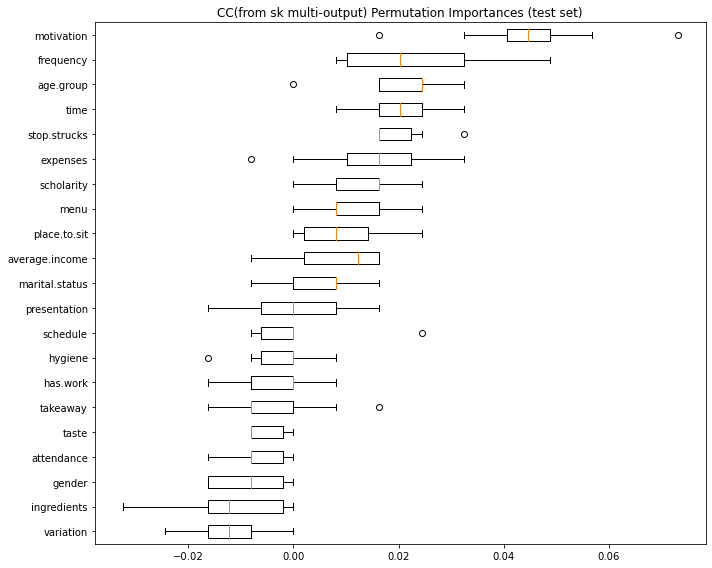

In [20]:
result_chain_clf = permutation_importance(chain_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_chain_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_chain_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("CC(from sk multi-output) Permutation Importances (test set)")
fig.tight_layout()
plt.show()


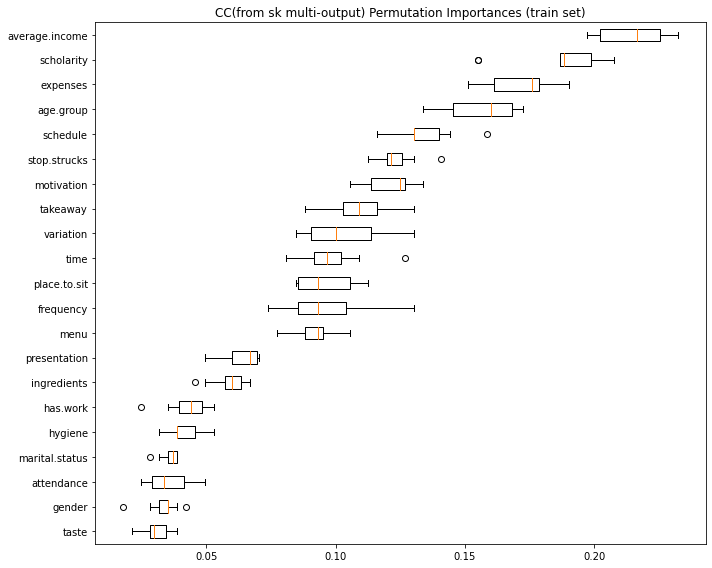

In [7]:
result_chain_clf2 = permutation_importance(chain_clf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_chain_clf2.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_chain_clf2.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("CC(from sk multi-output) Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## result_MO_clf

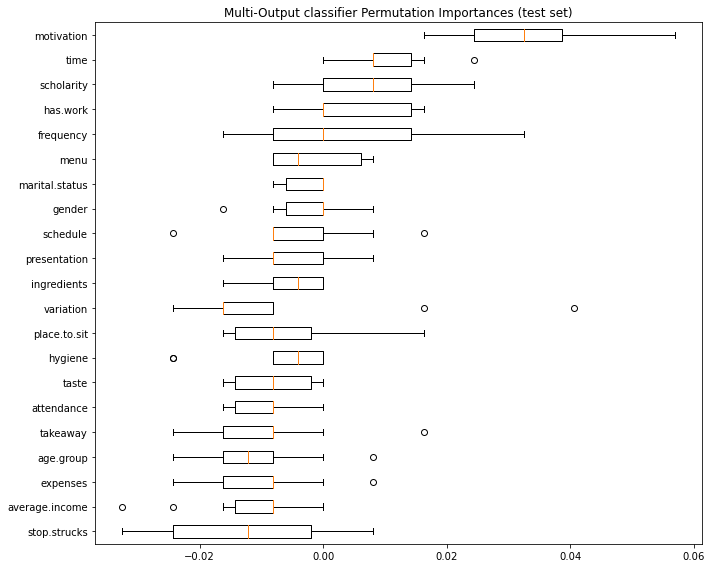

In [21]:
result_MO_clf = permutation_importance(MO_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_MO_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_MO_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Multi-Output classifier Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_MLkNN_clf

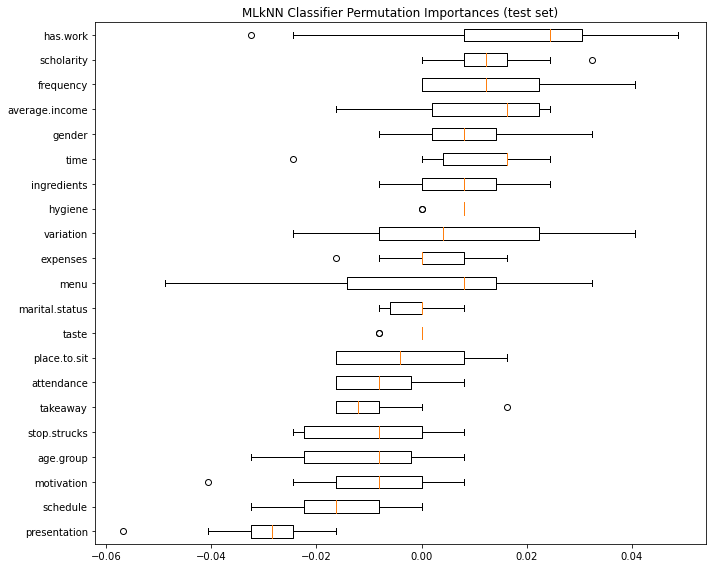

In [22]:
result_MLkNN_clf = permutation_importance(MLkNN_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_MLkNN_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_MLkNN_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("MLkNN Classifier Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_br_clf

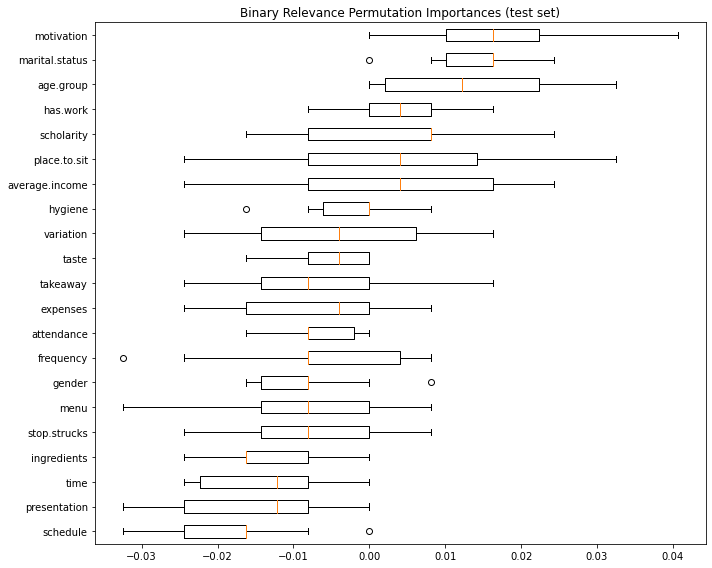

In [23]:
result_br_clf = permutation_importance(br_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_br_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_br_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Binary Relevance Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_cc_clf2

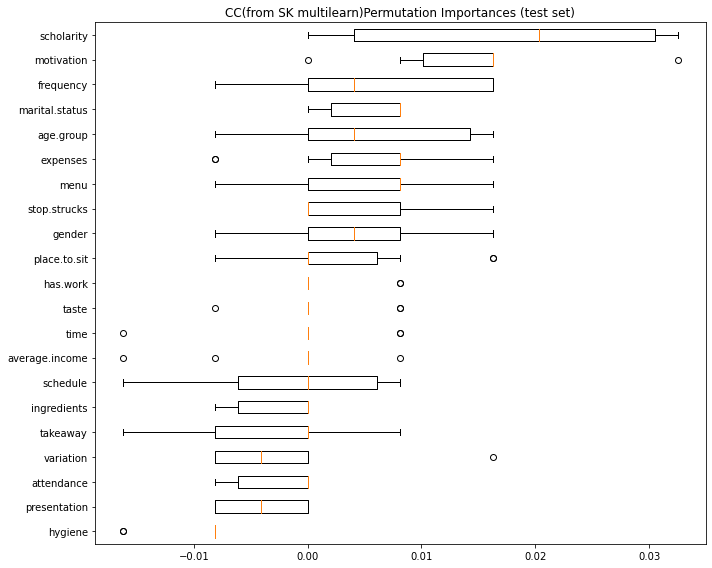

In [24]:
result_cc_clf2 = permutation_importance(cc_clf2, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_cc_clf2.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_cc_clf2.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("CC(from SK multilearn)Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_lp_clf

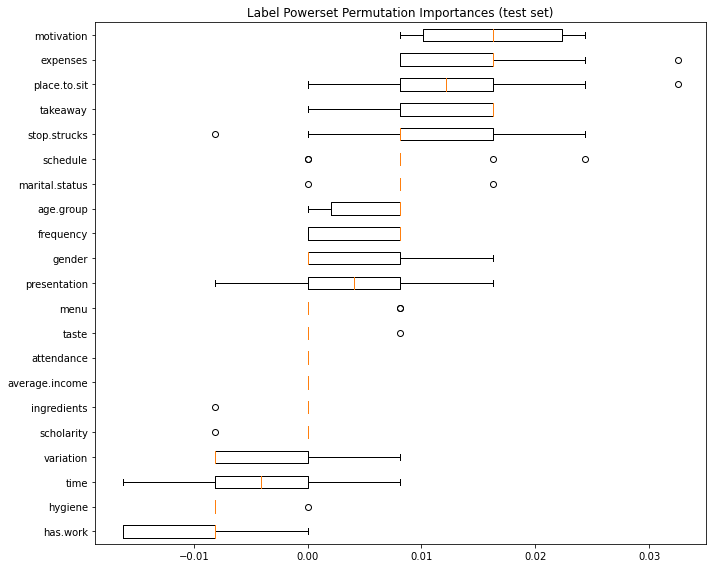

In [25]:
result_lp_clf = permutation_importance(lp_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_lp_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_lp_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Label Powerset Permutation Importances (test set)")
fig.tight_layout()
plt.show()
